In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("C:\\Users\\user\\2024_ai_test\\data\\HW2\\breast_cancer.csv", index_col=0)
df
#전체 데이터 569개

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
#1. 결측치 확인 및 제거
#1-1. 컬럼명 확인
df.columns
#label은 'label'값에 있음을 확인

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [4]:
#1-2. 전체 label의 개수 확인_데이터 불균형을 확인하며, label의 개수를 확인하기 위함
df['label'].value_counts()
#label은 binary classification이며 0보다 1값이 다소 많음을 확인

label
1    357
0    212
Name: count, dtype: int64

In [5]:
#1-3. 결측치 확인
df.isnull().sum()
#결측치가 다행히 없음을 확인. 만약 존재한다면 결측치 삭제 혹은 대치를 수행

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

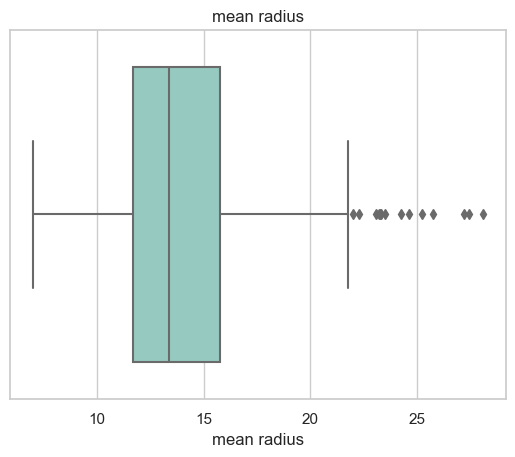

In [6]:
#2-2. boxplot확인
sns.set_theme(style="whitegrid")
sns.boxplot(x="mean radius", data=df, palette="Set3")
plt.title("mean radius")
plt.show()
#boxplot은 데이터의 분포와 이상치(outlier)를 볼 수있다. 중앙값(Q2)을 기준으로 상하위 25%지점(Q1, Q3)을 박스로 표시하며, 
#수염은 Q1와 Q3에서 상자길이(IQR)의 1.5배 만큼 떨어진 지점을 의미한다. 이 수염 밖의 수를 이상치로 간주한다.

#해석 결과 22지점을 넘는 이상치가 다소 존재한다는 것을 확인하였다.

Text(0.5, 1.0, 'Label Count')

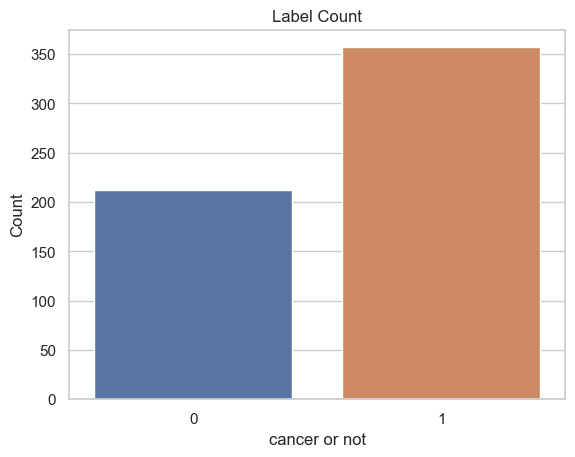

In [7]:
#2. 이상치 및 데이터 불균형 확인
#2-1. 산점도 확인
sns.countplot(data=df, x="label")
plt.xlabel("cancer or not")
plt.ylabel("Count")
plt.title("Label Count")
#cancer인 데이터가 다소 많음을 알 수 있음

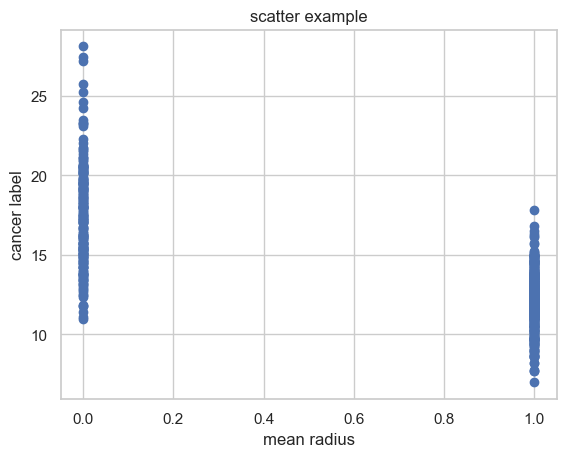

In [8]:
#2-1. 산점도 확인 두번째 방법. feature와 label
plt.scatter(df['label'], df['mean radius'])
plt.xlabel("mean radius")
plt.ylabel("cancer label")
plt.title("scatter example")
plt.grid(True)
plt.show()

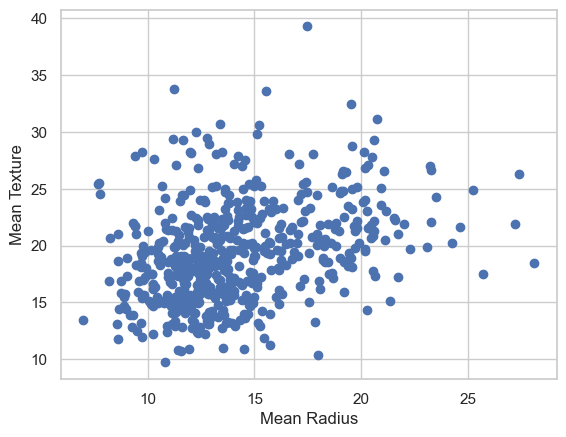

In [9]:
#2-1. 산점도 확인 세번째 방법. mean radius와 mean texture
plt.scatter(df['mean radius'], df['mean texture'])
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.show()

In [10]:
#2-3. 이상치 제거
#위의 박스플롯의 우측 수염은 Q3+ 1.5*IQR이니 quantile메서드를 이용해 각 지점을 구해보자
q1=df['mean radius'].quantile(0.25)
q2=df['mean radius'].quantile(0.5)
q3=df['mean radius'].quantile(0.75)
iqr=q3-q1#iqr은 박스의 길이이다.
iqr
#iqr이 4.08임을 확인할 수 있다.

4.08

In [11]:
condition=df['mean radius']>q3+1.5*iqr
df[condition]
#위의 boxplot에서는 우측 수염을 벗어나는 이상치만 있었기에 해당 이상치를 걸러준다.
#총 14개의 이상치를 발견할 수 있다.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
82,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,0.06782,...,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0
108,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,0.07039,...,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,0
122,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,0.06877,...,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,0
164,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,0.05553,...,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,0
180,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,...,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0
202,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,0.06229,...,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,0
212,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,0.05525,...,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0
236,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,0.06309,...,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0
339,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,0.05506,...,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,0
352,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,0.06121,...,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0


In [12]:
condition_index=df[condition].index
#이상치의 인덱스 번호를 얻어낸다
condition_index

Index([82, 108, 122, 164, 180, 202, 212, 236, 339, 352, 369, 461, 503, 521], dtype='int64')

In [13]:
df.drop(condition_index, inplace=True)
df
#mean radius의 이상치를 제거한다.
#전체 데이터 569개 중 mean radius이상치 데이터 14개가 제거되어 555개의 데이터가 됐음을 알 수 있음

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [14]:
#3. 레이블 개수 확인
X=df.drop('label', axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y=df['label']
y.value_counts()
#데이터 불균형 확인 및 상관관계 분석(EDA)

label
1    357
0    198
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_13728\248966236.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\AppData\Local\Temp\ipykernel_13728\248966236.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a fig

<Axes: xlabel='mean texture', ylabel='Density'>

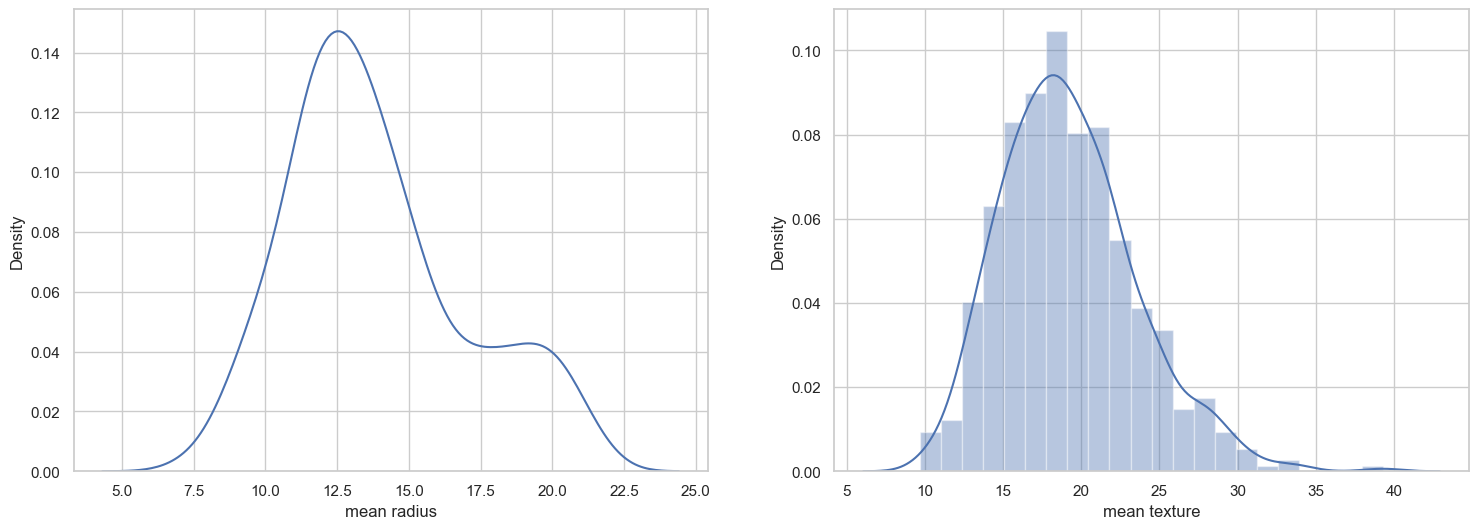

In [16]:
#3-1. sns를 이용한 가시화
# 컬럼 별 히스토그램

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['mean radius'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['mean texture'], ax=ax2)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

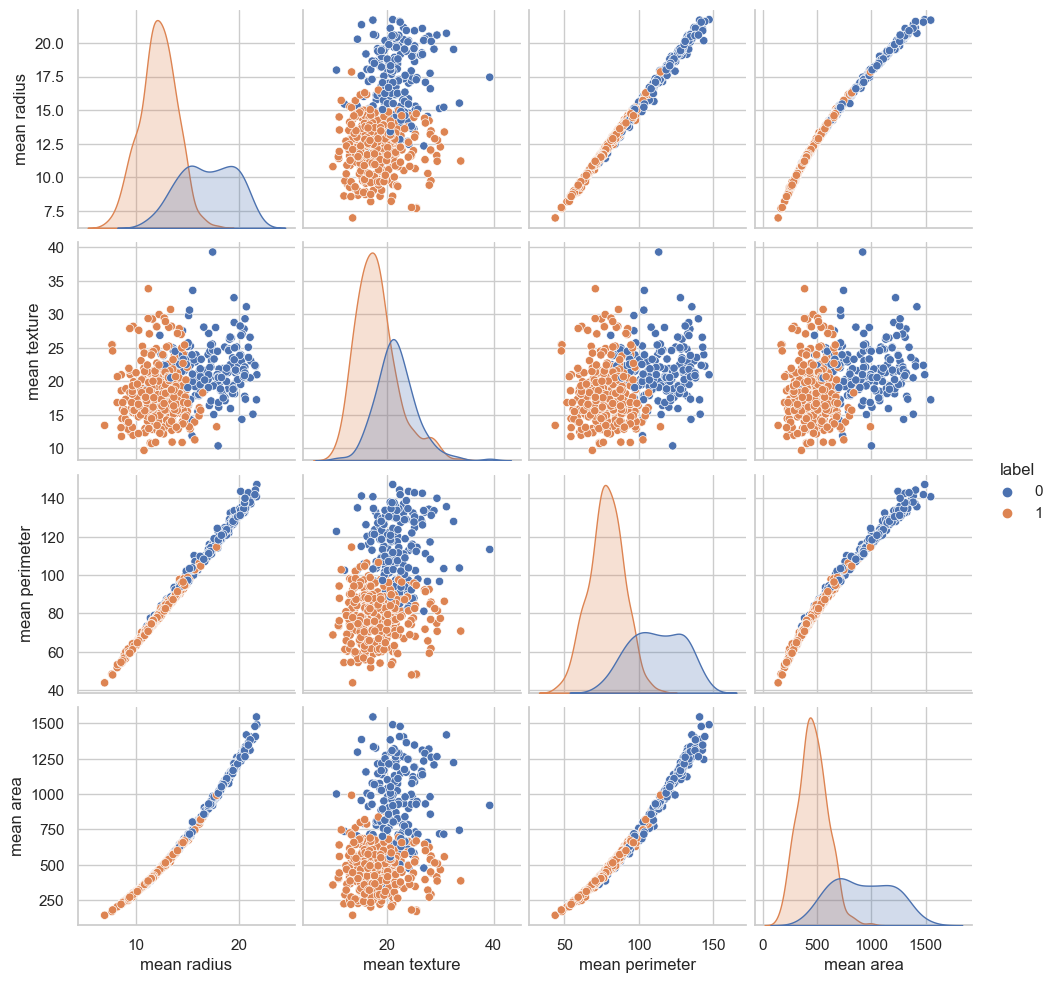

In [17]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'],
            hue ='label')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13728\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


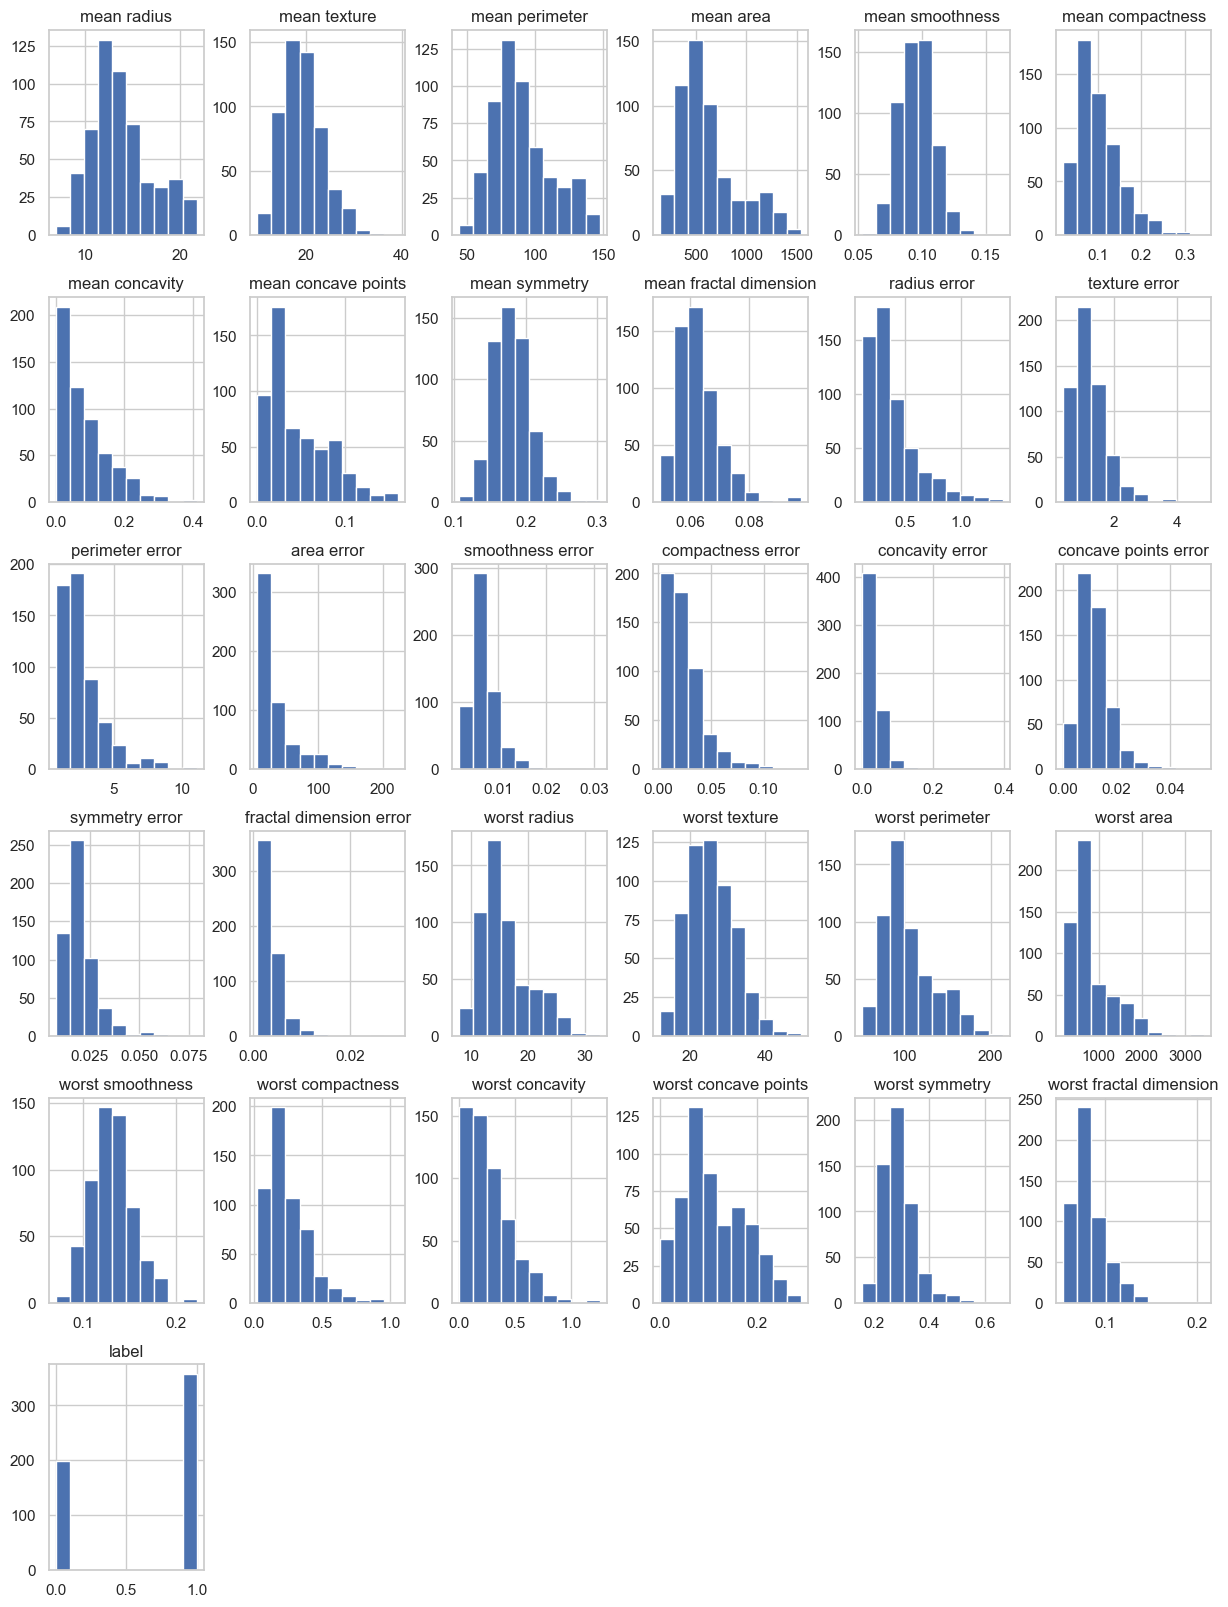

In [18]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [19]:
#4. Data Scaling
#Feature들의 데이터 분포와 범위를 동일하게 조정하여 골고루 잘 학습될 수 있게함

#4-1. 데이터 스케일링 이전에 X데이터와 Label데이터, train과 test를 분리하자(label을 scaling하면 결과치가 이상해질 수 있기에)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
140,9.738,11.97,61.24,288.5,0.09250,0.04102,0.00000,0.00000,0.1903,0.06422,...,10.62,14.10,66.53,342.9,0.1234,0.07204,0.0000,0.00000,0.3105,0.08151
279,13.850,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853,...,14.98,21.74,98.37,670.0,0.1185,0.17240,0.1456,0.09993,0.2955,0.06912
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.36820,0.2678,0.15560,0.3196,0.11510
476,14.200,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.1153,0.34290,0.2512,0.13390,0.2534,0.07858
527,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.20740,0.1791,0.10700,0.3110,0.07592


In [20]:
y_train.head()

140    1
279    1
7      0
476    1
527    1
Name: label, dtype: int64

In [21]:
#4-2. Standard Scaling 수행
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
std_scaler.fit(X_train)
X_train_standard_scaled=std_scaler.transform(X_train)
X_test_standard_scaled=std_scaler.transform(X_test)
X_train_standard_scaled[:2]

array([[-1.34597124, -1.73198042, -1.37308327, -1.16749424, -0.2415878 ,
        -1.2296704 , -1.18869476, -1.35967559,  0.35661318,  0.26072553,
        -0.84704508, -1.29392964, -0.96570015, -0.79022759, -0.32583385,
        -1.11304585, -1.00072172, -1.91267394,  0.2675537 , -0.20021188,
        -1.23736409, -1.89054838, -1.29386407, -1.0199345 , -0.36495797,
        -1.11249463, -1.29392209, -1.77693329,  0.32885194, -0.11147438],
       [-0.04930333, -0.95690757, -0.09399689, -0.16870216, -0.04952007,
        -0.49749858, -0.55906848, -0.28922731,  1.13281   , -0.55667789,
        -0.63608554, -0.54147507, -0.58759508, -0.57162939, -0.92963521,
        -0.54502201, -0.53529486, -0.21633339, -0.64739191, -0.86819047,
        -0.26261217, -0.63041011, -0.25767259, -0.37590325, -0.57643819,
        -0.48848183, -0.5917166 , -0.20904156,  0.08599594, -0.76965541]])

In [22]:
#4-2. MinMax Scaling 수행
from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_minmax_scaled=minmax_scaler.transform(X_train)
X_test_minmax_scaled=minmax_scaler.transform(X_test)
X_train_minmax_scaled[:2]

array([[0.18667479, 0.06859362, 0.16858275, 0.10338681, 0.29725444,
        0.08180856, 0.        , 0.        , 0.42575758, 0.30033698,
        0.06721886, 0.03001238, 0.05161454, 0.02308551, 0.14709182,
        0.02556554, 0.        , 0.        , 0.27787525, 0.07856752,
        0.10952769, 0.03354241, 0.09853903, 0.0485709 , 0.34491184,
        0.04341667, 0.        , 0.        , 0.30356791, 0.17361931],
       [0.46509581, 0.20707506, 0.43667279, 0.31650624, 0.32361978,
        0.21737487, 0.10903116, 0.23758003, 0.53030303, 0.18049705,
        0.10632367, 0.12360767, 0.12234473, 0.05605822, 0.08573274,
        0.09882236, 0.03679293, 0.1975753 , 0.13807906, 0.02225007,
        0.28705212, 0.2418871 , 0.29317195, 0.14931625, 0.31255366,
        0.14078645, 0.11629393, 0.34423011, 0.27399961, 0.09235209]])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
#5. MinMax Scaling과 Standard Scaling의 모델(Logistic Regression) 정확도 비교
#5-1. MinMax Scaling
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_minmax_scaled, y_train)

pred_lr = clf_lr.predict(X_test_minmax_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9568345323741008
[[36  6]
 [ 0 97]]


In [25]:
#5-2. Standard Scaling
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train_standard_scaled, y_train)

pred_lr = clf_lr.predict(X_test_standard_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))
# Logistic Regression모델에서는 MinMaxScaling이 StandardScaling보다 정확도가 약 2%높았다.


--- Logistic Regression Classifier ---
0.9712230215827338
[[39  3]
 [ 1 96]]


In [26]:
#아래는 추가적으로 모델 별 차이를 보기위한 코드이다

#1. SVM
# MinMaxScaler
clf_svm=SVC(random_state=0)
clf_svm.fit(X_train_minmax_scaled, y_train)

pred_svm=clf_svm.predict(X_test_minmax_scaled)

print("\n--- SVM Classifier with minmax scaling ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))

# StandardScaler
clf_svm=SVC(random_state=0)
clf_svm.fit(X_train_standard_scaled, y_train)

pred_svm=clf_svm.predict(X_test_standard_scaled)

print("\n--- SVM Classifier with standard scaling ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier with minmax scaling ---
0.9712230215827338
[[39  3]
 [ 1 96]]

--- SVM Classifier with standard scaling ---
0.9784172661870504
[[39  3]
 [ 0 97]]


In [27]:
#2. MLP
# MinMaxScaler
clf_nn=MLPClassifier(random_state=0)
clf_nn.fit(X_train_minmax_scaled, y_train)

pred_nn=clf_nn.predict(X_test_minmax_scaled)

print("\n--- MLP Classifier with minmax scaling ---")
print(accuracy_score(y_test, pred_nn))
print(confusion_matrix(y_test, pred_nn))

# StandardScaler
clf_nn=MLPClassifier(random_state=0)
clf_nn.fit(X_train_standard_scaled, y_train)

pred_nn=clf_nn.predict(X_test_standard_scaled)

print("\n--- MLP Classifier with standard scaling ---")
print(accuracy_score(y_test, pred_nn))
print(confusion_matrix(y_test, pred_nn))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



--- MLP Classifier with minmax scaling ---
0.9496402877697842
[[36  6]
 [ 1 96]]

--- MLP Classifier with standard scaling ---
0.9784172661870504
[[39  3]
 [ 0 97]]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
#3. DecisionTree
# MinMaxScaler
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_minmax_scaled, y_train)

pred_dt=clf_dt.predict(X_test_minmax_scaled)

print("\n--- DecisionTree Classifier with minmax scaling ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))

# StandardScaler
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train_standard_scaled, y_train)

pred_dt=clf_dt.predict(X_test_standard_scaled)

print("\n--- DecisionTree Classifier with standard scaling ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


--- DecisionTree Classifier with minmax scaling ---
0.9424460431654677
[[38  4]
 [ 4 93]]

--- DecisionTree Classifier with standard scaling ---
0.9424460431654677
[[38  4]
 [ 4 93]]


In [29]:
#4. Random Forest
# MinMaxScaler
clf_rf=RandomForestClassifier(random_state=0)
clf_rf.fit(X_train_minmax_scaled, y_train)

pred_rf=clf_rf.predict(X_test_minmax_scaled)

print("\n--- RandomForest Classifier with minmax scaling ---")
print(accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

# StandardScaler
clf_rf=RandomForestClassifier(random_state=0)
clf_rf.fit(X_train_standard_scaled, y_train)

pred_rf=clf_rf.predict(X_test_standard_scaled)

print("\n--- RandomForest Classifier with standard scaling ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


--- RandomForest Classifier with minmax scaling ---
0.9496402877697842
[[37  5]
 [ 2 95]]

--- RandomForest Classifier with standard scaling ---
0.9424460431654677
[[38  4]
 [ 4 93]]
